In [91]:
import pandas as pd
import warnings
import numpy as np


In [71]:
warnings.filterwarnings("ignore")


In [72]:

# 定义 CSV 文件的路径
file_path = r'E:\00007\group_project\dataset\2021-2023_LSOA_LEVEL_CRIME.csv'

# 使用 pandas 读取 CSV 文件
data = pd.read_csv(file_path)


In [73]:
file_path2 = r'E:\00007\group_project\dataset\green_processed.csv'
data2=pd.read_csv(file_path2)

In [74]:
print(data.columns.tolist())
print(data2.columns.tolist())

['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category', '202111', '202112', '202201', '202202', '202203', '202204', '202205', '202206', '202207', '202208', '202209', '202210', '202211', '202212', '202301', '202302', '202303', '202304', '202305', '202306', '202307', '202308', '202309', '202310']
['lb_code', 'lb_name', 'borough_area_hectare', 'green_area_hectare', 'blue _area_hectare', 'green+blue_area_hectare', 'percent_green', 'percent_blue', 'percent_green+blue']


In [75]:
# 获取所有月份的列名
month_columns = [col for col in data.columns if col.isdigit()]

# 计算每个区域的总犯罪数（所有月份的和）
total_crimes_by_area = data[month_columns].sum(axis=1)
total_crimes_with_location = pd.DataFrame({
    'LSOA Code': data['LSOA Code'],
    'LSOA Name': data['LSOA Name'],
    'Borough': data['Borough'],
    'Total Crimes': total_crimes_by_area
})

# 显示犯罪数最多的10个区域
print("犯罪数最多的10个区域：")
print(total_crimes_with_location.sort_values('Total Crimes', ascending=False).head(10))

犯罪数最多的10个区域：
        LSOA Code         LSOA Name    Borough  Total Crimes
105400  E01035716  Westminster 013G  E09000033          9651
105398  E01035716  Westminster 013G  E09000033          9083
94648   E01004763  Westminster 013B  E09000033          6963
94646   E01004763  Westminster 013B  E09000033          6266
94058   E01004734  Westminster 018A  E09000033          6096
94056   E01004734  Westminster 018A  E09000033          6071
94126   E01004736  Westminster 018C  E09000033          2820
94124   E01004736  Westminster 018C  E09000033          2517
105399  E01035716  Westminster 013G  E09000033          2501
48160   E01002444   Hillingdon 031A  E09000017          2474


In [76]:
# 按Major Category和区域分组计算总和
crimes_by_category = data.groupby(['LSOA Code', 'LSOA Name', 'Major Category'])[month_columns].sum().sum(axis=1).reset_index()
crimes_by_category.columns = ['LSOA Code', 'LSOA Name', 'Crime Type', 'Total']

# 找出每个区域最常见的犯罪类型
most_common_crime = crimes_by_category.sort_values('Total', ascending=False).groupby('LSOA Code').first()
print("\n各区域最常见的犯罪类型（前10个区域）：")
print(most_common_crime.head(10))


各区域最常见的犯罪类型（前10个区域）：
                           LSOA Name                   Crime Type  Total
LSOA Code                                                               
E01000006  Barking and Dagenham 016A  Violence Against the Person     74
E01000007  Barking and Dagenham 015A  Violence Against the Person    350
E01000008  Barking and Dagenham 015B  Violence Against the Person    124
E01000009  Barking and Dagenham 016B  Violence Against the Person    195
E01000011  Barking and Dagenham 016C  Violence Against the Person    110
E01000012  Barking and Dagenham 015D  Violence Against the Person    159
E01000013  Barking and Dagenham 013A  Violence Against the Person    160
E01000014  Barking and Dagenham 013B  Violence Against the Person     79
E01000015  Barking and Dagenham 009A  Violence Against the Person    116
E01000016  Barking and Dagenham 009B  Violence Against the Person     70


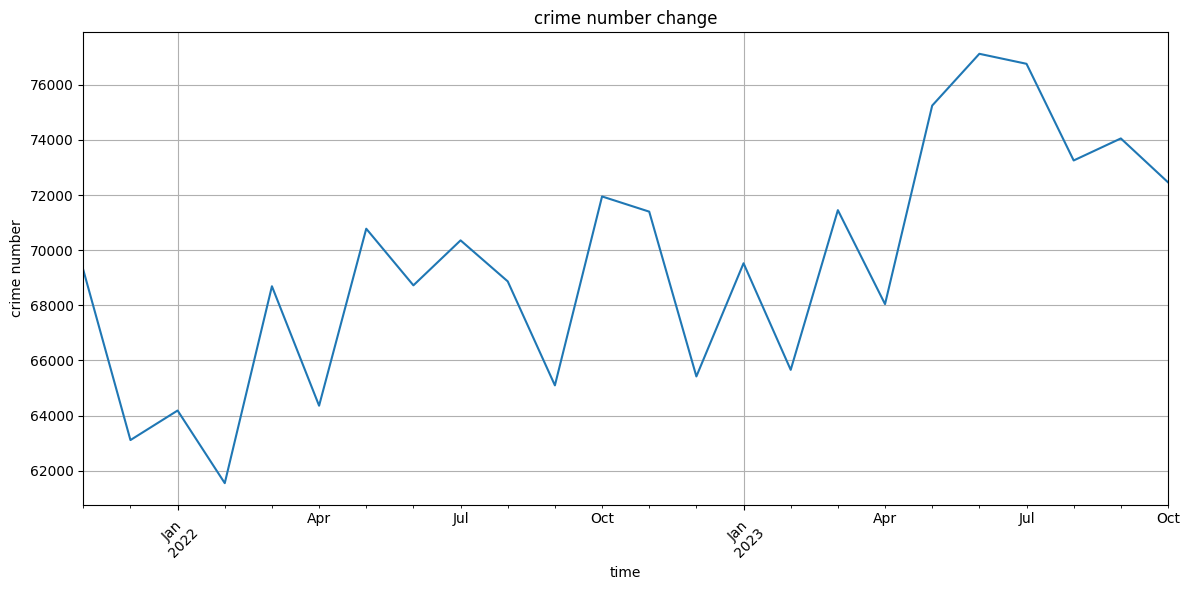

In [77]:
# 计算每个月份的总犯罪数
monthly_totals = data[month_columns].sum()

# 将索引转换为日期格式
monthly_totals.index = pd.to_datetime(monthly_totals.index, format='%Y%m')

# 绘制时间序列图
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_totals.plot()
plt.title('crime number change')
plt.xlabel('time')
plt.ylabel('crime number')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

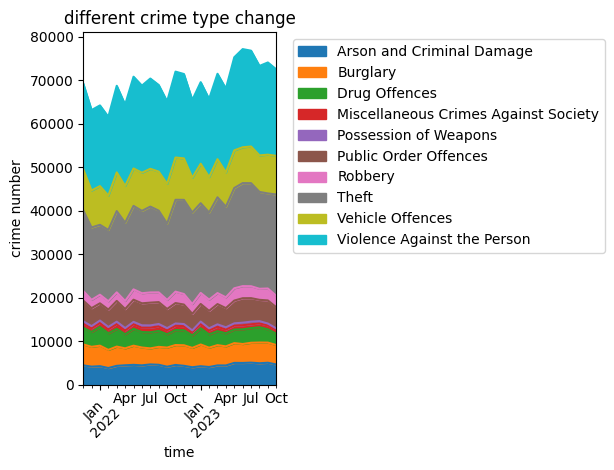

In [78]:
# 按犯罪类型统计每月犯罪数
crime_types_over_time = data.groupby('Major Category')[month_columns].sum()

# 转置数据以便绘图
crime_types_over_time = crime_types_over_time.T
crime_types_over_time.index = pd.to_datetime(crime_types_over_time.index, format='%Y%m')

# 绘制堆叠面积图
plt.figure(figsize=(15, 8))
crime_types_over_time.plot(kind='area', stacked=True)
plt.title('different crime type change')
plt.xlabel('time')
plt.ylabel('crime number')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
import geopandas as gpd

# 读取 Shapefile 文件
shapefile_path = r'E:\00007\group_project\dataset\tile_grid_467_bng_GLA\cir_2km_tile_lu_gla_clip.shp'
gdf = gpd.read_file(shapefile_path)

# 查看数据
print(gdf.head())  # 打印前几行数据
print(gdf.crs)     # 打印坐标参考系统


   tile_num   tile_area                                           geometry
0         7   90.121729  POLYGON ((561957.007 185001.130, 561782.784 18...
1         8    2.696770  MULTIPOLYGON (((561470.500 184984.400, 561435....
2        29   99.137856  POLYGON ((560575.261 187001.128, 558999.122 18...
3        30  388.128466  POLYGON ((560999.122 186514.168, 560999.123 18...
4        31   64.270023  POLYGON ((560999.123 184936.160, 560968.900 18...
EPSG:27700


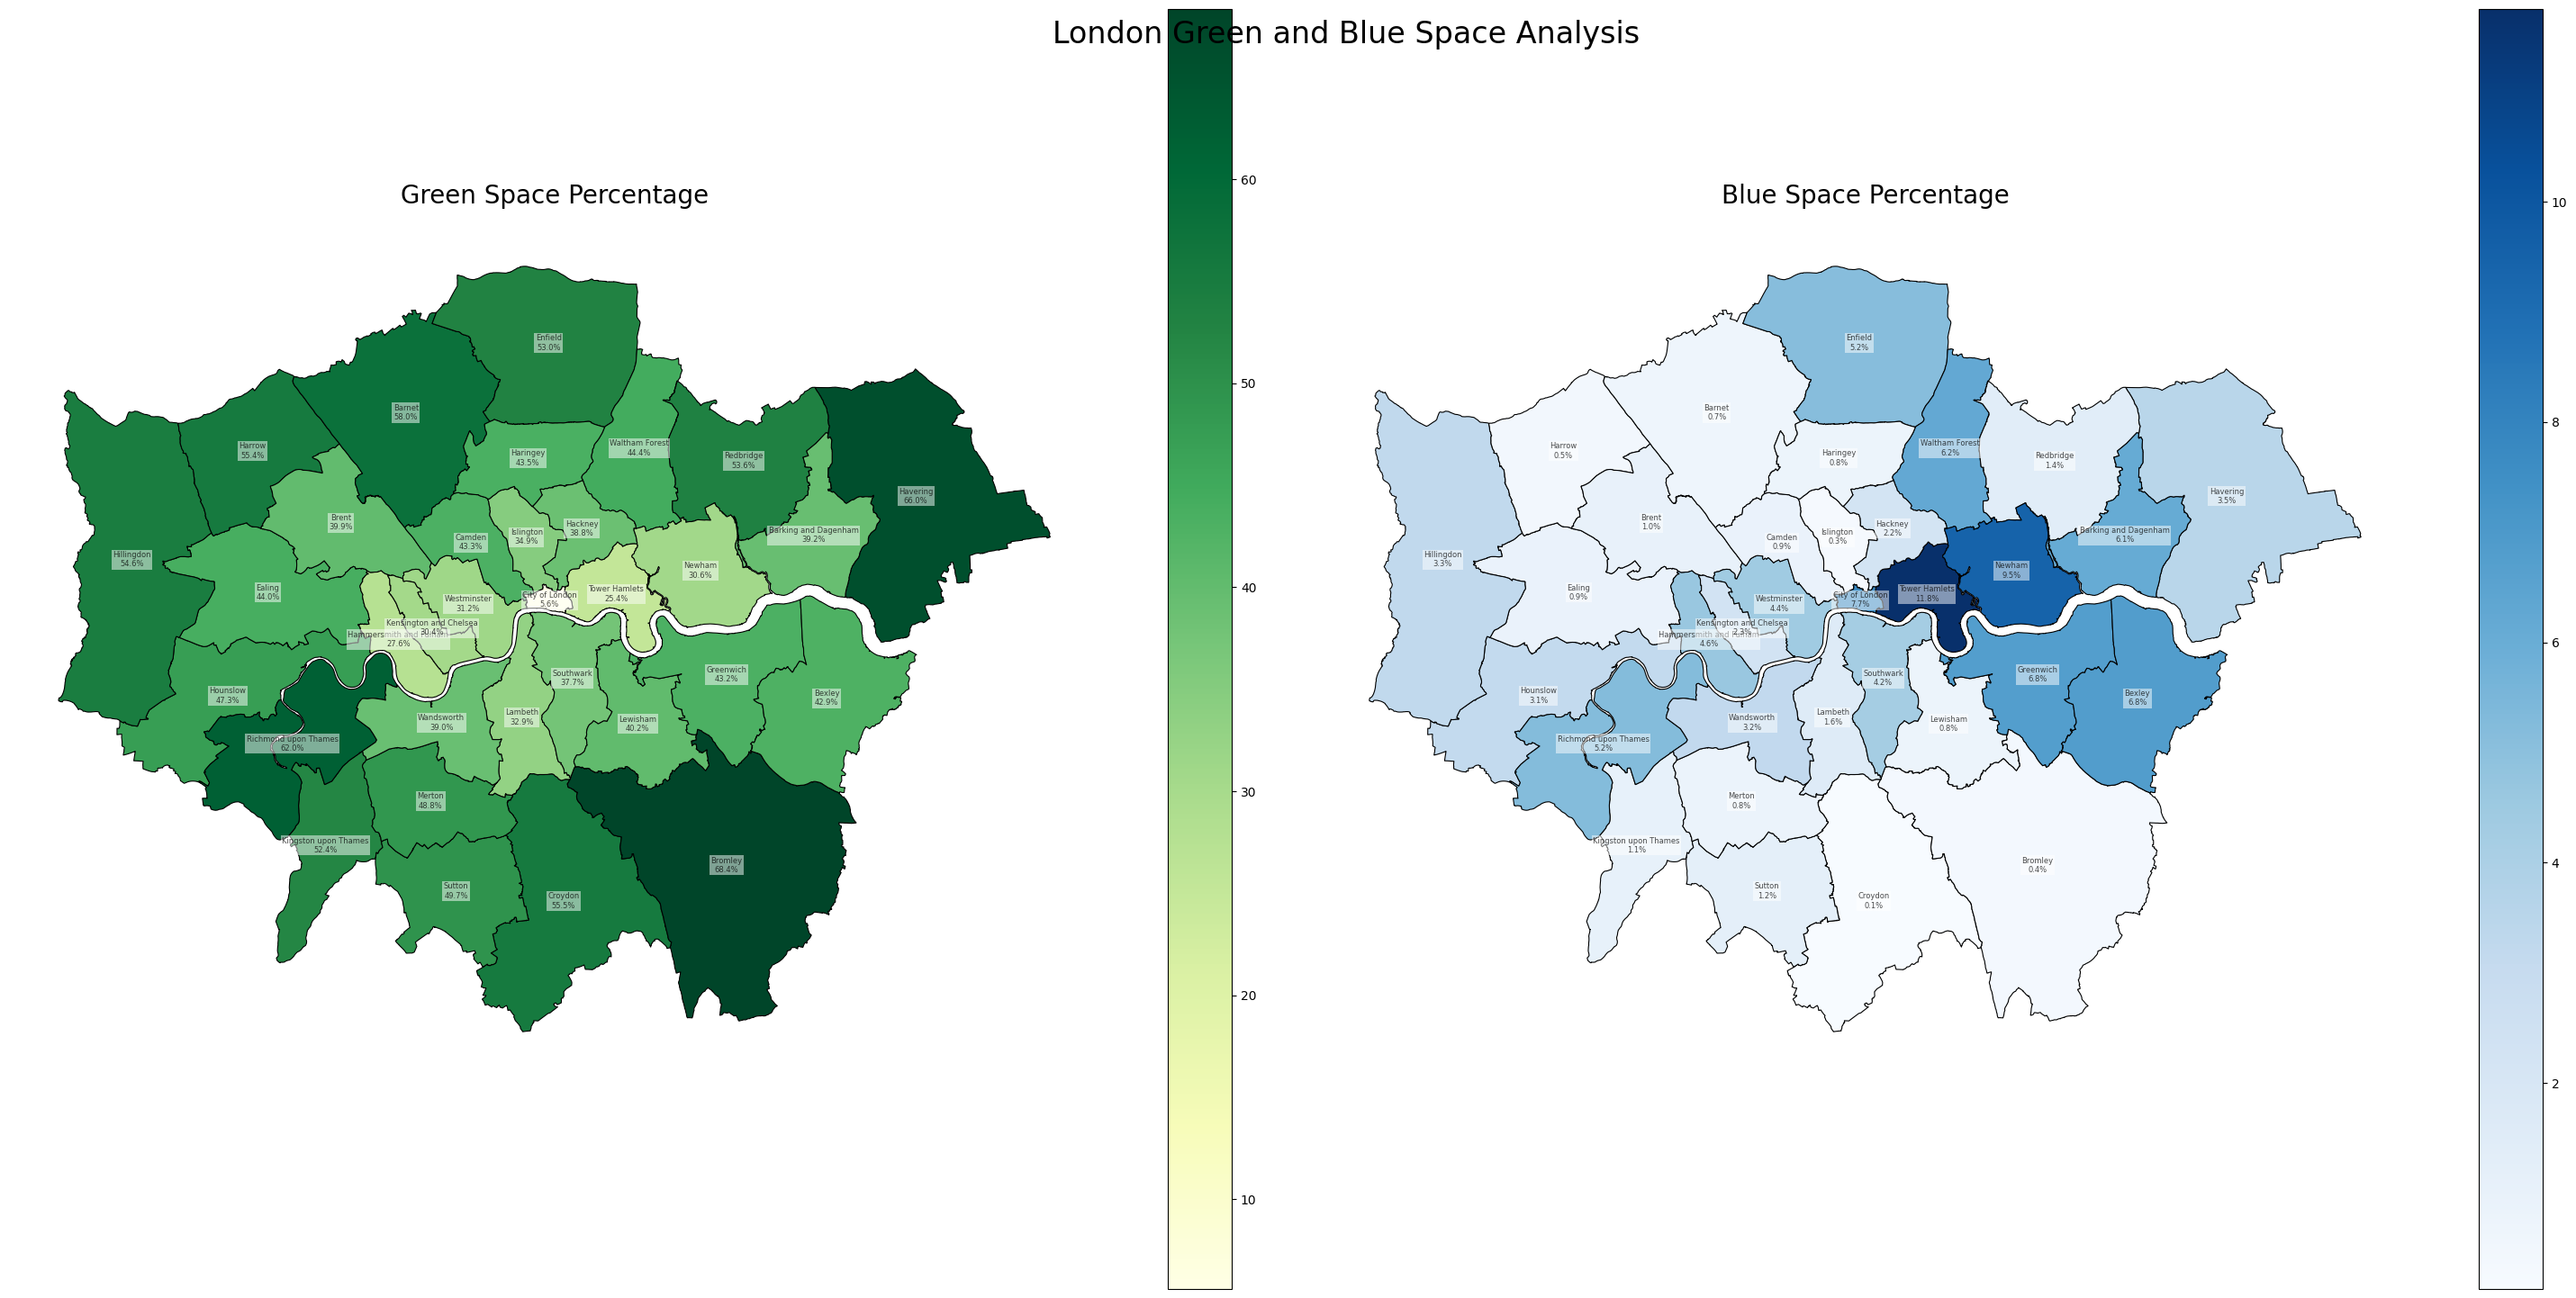


绿地统计信息：
平均绿地百分比: 43.62%
最高绿地百分比: 68.36%
最低绿地百分比: 5.59%

水域统计信息：
平均水域百分比: 3.30%
最高水域百分比: 11.75%
最低水域百分比: 0.13%

绿地百分比最高的三个区域：
                    NAME  percent_green
2                Bromley          68.36
5               Havering          65.98
19  Richmond upon Thames          61.99

水域百分比最高的三个区域：
              NAME  percent_blue
26   Tower Hamlets         11.75
30          Newham          9.46
32  City of London          7.72


In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取伦敦行政区边界数据
london_map = gpd.read_file(r'E:\00007\group_project\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp')

# 将绿化数据与地图数据合并
merged_data = london_map.merge(data2, how='left', left_on='NAME', right_on='lb_code')

# 创建两个并排的地图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('London Green and Blue Space Analysis', fontsize=24, y=0.95)

# 1. 绿地比例地图
green_map = merged_data.plot(column='percent_green',
                           ax=ax1,
                           legend=True,
                           cmap='YlGn',
                           missing_kwds={'color': 'lightgrey'},
                           edgecolor='black',
                           linewidth=0.8)
ax1.set_title('Green Space Percentage', fontsize=20, pad=20)
ax1.axis('off')

# 2. 水域比例地图
blue_map = merged_data.plot(column='percent_blue',
                          ax=ax2,
                          legend=True,
                          cmap='Blues',
                          missing_kwds={'color': 'lightgrey'},
                          edgecolor='black',
                          linewidth=0.8)
ax2.set_title('Blue Space Percentage', fontsize=20, pad=20)
ax2.axis('off')

# 为每个区域添加标签，使用更小的字体并调整位置
for idx, row in merged_data.iterrows():
    centroid = row.geometry.centroid
    # 在绿地地图上添加标签
    ax1.annotate(text=f"{row['NAME']}\n{row['percent_green']:.1f}%", 
                xy=(centroid.x, centroid.y),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=6,
                alpha=0.7,
                bbox=dict(facecolor='white', 
                         alpha=0.5,
                         edgecolor='none',
                         pad=1))
    
    # 在水域地图上添加标签
    ax2.annotate(text=f"{row['NAME']}\n{row['percent_blue']:.1f}%", 
                xy=(centroid.x, centroid.y),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=6,
                alpha=0.7,
                bbox=dict(facecolor='white', 
                         alpha=0.5,
                         edgecolor='none',
                         pad=1))

plt.tight_layout()
plt.show()

# 输出统计信息
print("\n绿地统计信息：")
print(f"平均绿地百分比: {merged_data['percent_green'].mean():.2f}%")
print(f"最高绿地百分比: {merged_data['percent_green'].max():.2f}%")
print(f"最低绿地百分比: {merged_data['percent_green'].min():.2f}%")

print("\n水域统计信息：")
print(f"平均水域百分比: {merged_data['percent_blue'].mean():.2f}%")
print(f"最高水域百分比: {merged_data['percent_blue'].max():.2f}%")
print(f"最低水域百分比: {merged_data['percent_blue'].min():.2f}%")

print("\n绿地百分比最高的三个区域：")
top_3_green = merged_data.nlargest(3, 'percent_green')[['NAME', 'percent_green']]
print(top_3_green)

print("\n水域百分比最高的三个区域：")
top_3_blue = merged_data.nlargest(3, 'percent_blue')[['NAME', 'percent_blue']]
print(top_3_blue)

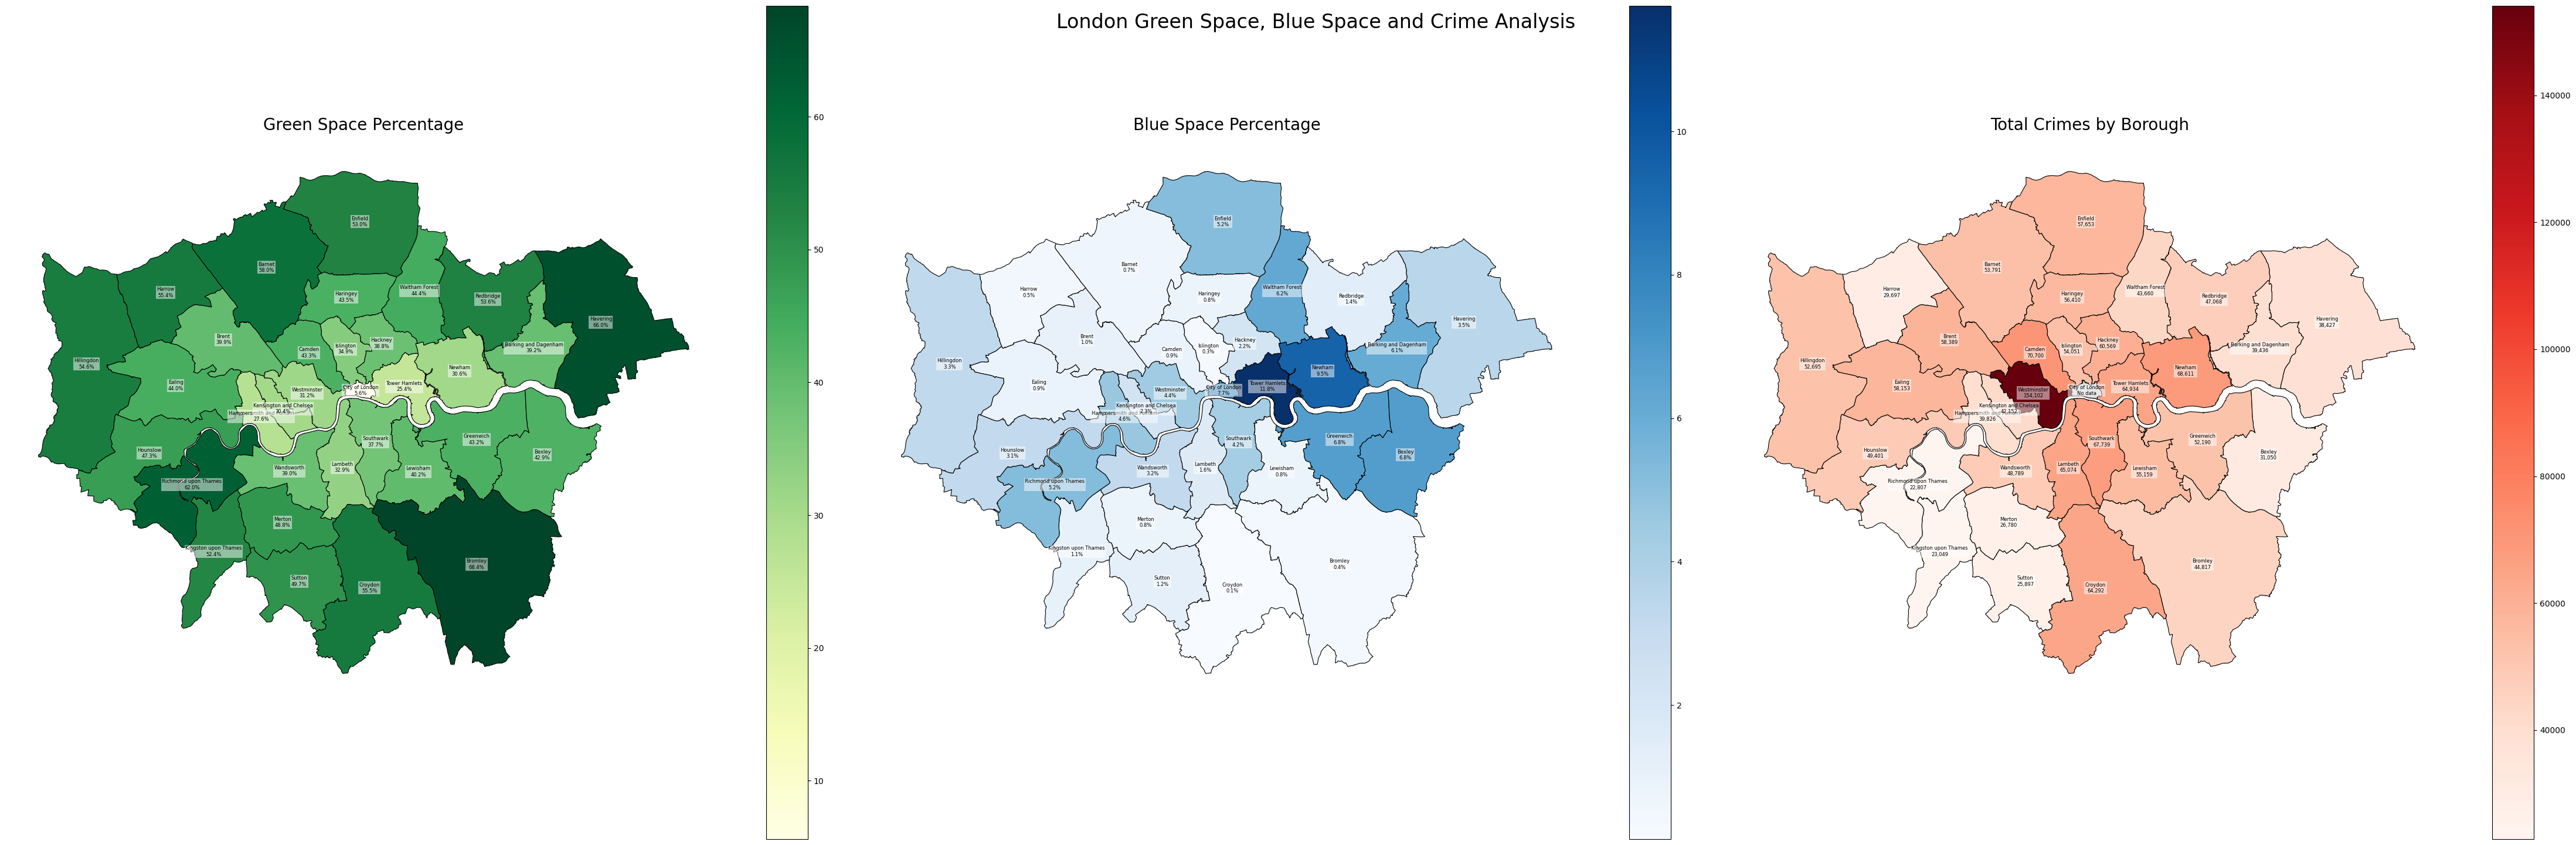


绿地统计信息：
平均绿地百分比: 43.62%
最高绿地百分比: 68.36%
最低绿地百分比: 5.59%

水域统计信息：
平均水域百分比: 3.30%
最高水域百分比: 11.75%
最低水域百分比: 0.13%

犯罪统计信息：
平均犯罪数量: 52105
最高犯罪数量: 154102
最低犯罪数量: 22807

数据清理信息：
原始数据行数: 33
清理后数据行数: 32

相关性分析（清理后的数据）：
绿地比例与犯罪数量的相关性: -0.417
水域比例与犯罪数量的相关性: 0.122

详细分析：

绿地比例最高的三个区域：
                    NAME  percent_green  Total Crimes
2                Bromley          68.36       44817.0
5               Havering          65.98       38427.0
19  Richmond upon Thames          61.99       22807.0

绿地比例最低的三个区域：
                      NAME  percent_green  Total Crimes
26           Tower Hamlets          25.38       64934.0
22  Hammersmith and Fulham          27.60       39826.0
23  Kensington and Chelsea          30.37       42152.0

犯罪数量最高的三个区域：
           NAME  percent_green  Total Crimes
24  Westminster          31.20      154102.0
25       Camden          43.28       70700.0
30       Newham          30.64       68611.0

犯罪数量最低的三个区域：
                    NAME  percent_green  Total Crimes
19  Richm

In [84]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 读取伦敦行政区边界数据
london_map = gpd.read_file(r'E:\00007\group_project\statistical-gis-boundaries-london\ESRI\London_Borough_Excluding_MHW.shp')

# 创建区域名称和代码的映射关系
borough_codes = {
    'City of London': 'E09000001',
    'Barking and Dagenham': 'E09000002',
    'Barnet': 'E09000003',
    'Bexley': 'E09000004',
    'Brent': 'E09000005',
    'Bromley': 'E09000006',
    'Camden': 'E09000007',
    'Croydon': 'E09000008',
    'Ealing': 'E09000009',
    'Enfield': 'E09000010',
    'Greenwich': 'E09000011',
    'Hackney': 'E09000012',
    'Hammersmith and Fulham': 'E09000013',
    'Haringey': 'E09000014',
    'Harrow': 'E09000015',
    'Havering': 'E09000016',
    'Hillingdon': 'E09000017',
    'Hounslow': 'E09000018',
    'Islington': 'E09000019',
    'Kensington and Chelsea': 'E09000020',
    'Kingston upon Thames': 'E09000021',
    'Lambeth': 'E09000022',
    'Lewisham': 'E09000023',
    'Merton': 'E09000024',
    'Newham': 'E09000025',
    'Redbridge': 'E09000026',
    'Richmond upon Thames': 'E09000027',
    'Southwark': 'E09000028',
    'Sutton': 'E09000029',
    'Tower Hamlets': 'E09000030',
    'Waltham Forest': 'E09000031',
    'Wandsworth': 'E09000032',
    'Westminster': 'E09000033'
}

# 添加区域代码到地图数据
london_map['CODE'] = london_map['NAME'].map(borough_codes)

# 将绿化数据与地图数据合并
merged_data = london_map.merge(data2, how='left', left_on='NAME', right_on='lb_code')

# 将犯罪数据与合并后的数据合并
merged_data = merged_data.merge(borough_crimes, how='left', left_on='CODE', right_on='Borough')

# 创建三个并排的地图
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(45, 15))
fig.suptitle('London Green Space, Blue Space and Crime Analysis', fontsize=24, y=0.95)

# 1. 绿地比例地图
green_map = merged_data.plot(column='percent_green',
                           ax=ax1,
                           legend=True,
                           cmap='YlGn',
                           missing_kwds={'color': 'lightgrey'},
                           edgecolor='black',
                           linewidth=0.8)
ax1.set_title('Green Space Percentage', fontsize=20, pad=20)
ax1.axis('off')

# 2. 水域比例地图
blue_map = merged_data.plot(column='percent_blue',
                          ax=ax2,
                          legend=True,
                          cmap='Blues',
                          missing_kwds={'color': 'lightgrey'},
                          edgecolor='black',
                          linewidth=0.8)
ax2.set_title('Blue Space Percentage', fontsize=20, pad=20)
ax2.axis('off')

# 3. 犯罪数量地图
crime_map = merged_data.plot(column='Total Crimes',
                           ax=ax3,
                           legend=True,
                           cmap='Reds',
                           missing_kwds={'color': 'lightgrey'},
                           edgecolor='black',
                           linewidth=0.8)
ax3.set_title('Total Crimes by Borough', fontsize=20, pad=20)
ax3.axis('off')

# 为每个区域添加标签
for idx, row in merged_data.iterrows():
    centroid = row.geometry.centroid
    
    # 在绿地地图上添加标签
    ax1.annotate(text=f"{row['NAME']}\n{row['percent_green']:.1f}%", 
                xy=(centroid.x, centroid.y),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=6,
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))
    
    # 在水域地图上添加标签
    ax2.annotate(text=f"{row['NAME']}\n{row['percent_blue']:.1f}%", 
                xy=(centroid.x, centroid.y),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=6,
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))
    
    # 在犯罪地图上添加标签
    if pd.notna(row['Total Crimes']):
        crime_text = f"{row['NAME']}\n{row['Total Crimes']:,.0f}"
    else:
        crime_text = f"{row['NAME']}\nNo data"
    ax3.annotate(text=crime_text, 
                xy=(centroid.x, centroid.y),
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=6,
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=1))

plt.tight_layout()
plt.show()

# 输出统计信息
print("\n绿地统计信息：")
print(f"平均绿地百分比: {merged_data['percent_green'].mean():.2f}%")
print(f"最高绿地百分比: {merged_data['percent_green'].max():.2f}%")
print(f"最低绿地百分比: {merged_data['percent_green'].min():.2f}%")

print("\n水域统计信息：")
print(f"平均水域百分比: {merged_data['percent_blue'].mean():.2f}%")
print(f"最高水域百分比: {merged_data['percent_blue'].max():.2f}%")
print(f"最低水域百分比: {merged_data['percent_blue'].min():.2f}%")

print("\n犯罪统计信息：")
print(f"平均犯罪数量: {merged_data['Total Crimes'].mean():.0f}")
print(f"最高犯罪数量: {merged_data['Total Crimes'].max():.0f}")
print(f"最低犯罪数量: {merged_data['Total Crimes'].min():.0f}")

# ... [前面的代码保持不变，直到统计信息输出] ...

# 清理数据并计算相关性
clean_data = merged_data.dropna(subset=['percent_green', 'percent_blue', 'Total Crimes'])

print("\n数据清理信息：")
print(f"原始数据行数: {len(merged_data)}")
print(f"清理后数据行数: {len(clean_data)}")

print("\n相关性分析（清理后的数据）：")
correlation_green_crime = clean_data['percent_green'].corr(clean_data['Total Crimes'])
correlation_blue_crime = clean_data['percent_blue'].corr(clean_data['Total Crimes'])
print(f"绿地比例与犯罪数量的相关性: {correlation_green_crime:.3f}")
print(f"水域比例与犯罪数量的相关性: {correlation_blue_crime:.3f}")

# 添加更详细的分析
print("\n详细分析：")
# 按绿地比例排序的前三名和后三名
print("\n绿地比例最高的三个区域：")
print(clean_data.nlargest(3, 'percent_green')[['NAME', 'percent_green', 'Total Crimes']])
print("\n绿地比例最低的三个区域：")
print(clean_data.nsmallest(3, 'percent_green')[['NAME', 'percent_green', 'Total Crimes']])

# 按犯罪数量排序的前三名和后三名
print("\n犯罪数量最高的三个区域：")
print(clean_data.nlargest(3, 'Total Crimes')[['NAME', 'percent_green', 'Total Crimes']])
print("\n犯罪数量最低的三个区域：")
print(clean_data.nsmallest(3, 'Total Crimes')[['NAME', 'percent_green', 'Total Crimes']])

# 计算每千公顷绿地的犯罪数量
clean_data['crimes_per_green_hectare'] = clean_data['Total Crimes'] / (clean_data['percent_green'] * clean_data['borough_area_hectare'] / 100)

print("\n每千公顷绿地的犯罪数量：")
print("最高：")
print(clean_data.nlargest(3, 'crimes_per_green_hectare')[['NAME', 'crimes_per_green_hectare', 'percent_green', 'Total Crimes']])
print("\n最低：")
print(clean_data.nsmallest(3, 'crimes_per_green_hectare')[['NAME', 'crimes_per_green_hectare', 'percent_green', 'Total Crimes']])

# 计算分位数
print("\n分位数分析：")
percentiles = [0.25, 0.5, 0.75]
print("\n绿地比例分位数：")
print(clean_data['percent_green'].quantile(percentiles))
print("\n犯罪数量分位数：")
print(clean_data['Total Crimes'].quantile(percentiles))



In [86]:
# 添加额外的分析：找出最显著的区域
print("\n显著发现：")
print("绿地比例最高的区域：")
print(merged_data.nlargest(3, 'percent_green')[['NAME', 'percent_green', 'Total Crimes']])
print("\n犯罪数量最高的区域：")
print(merged_data.nlargest(3, 'Total Crimes')[['NAME', 'percent_green', 'Total Crimes']])
print("\n绿地比例最低的区域：")
print(merged_data.nsmallest(3, 'percent_green')[['NAME', 'percent_green', 'Total Crimes']])


显著发现：
绿地比例最高的区域：
                    NAME  percent_green  Total Crimes
2                Bromley          68.36       44817.0
5               Havering          65.98       38427.0
19  Richmond upon Thames          61.99       22807.0

犯罪数量最高的区域：
           NAME  percent_green  Total Crimes
24  Westminster          31.20      154102.0
25       Camden          43.28       70700.0
30       Newham          30.64       68611.0

绿地比例最低的区域：
                      NAME  percent_green  Total Crimes
32          City of London           5.59           NaN
26           Tower Hamlets          25.38       64934.0
22  Hammersmith and Fulham          27.60       39826.0


In [87]:
print(merged_data.columns.to_list())

['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009', 'SUB_2006', 'geometry', 'CODE', 'lb_code', 'lb_name', 'borough_area_hectare', 'green_area_hectare', 'blue _area_hectare', 'green+blue_area_hectare', 'percent_green', 'percent_blue', 'percent_green+blue', 'Borough', 'Total Crimes']



各类犯罪与绿地率的相关性（按绝对值排序）：
Robbery: -0.482
Drug Offences: -0.473
Public Order Offences: -0.436
Theft: -0.400
Possession of Weapons: -0.396
Burglary: -0.391
Violence Against the Person: -0.318
Arson and Criminal Damage: -0.194
Miscellaneous Crimes Against Society: 0.092
Vehicle Offences: -0.005


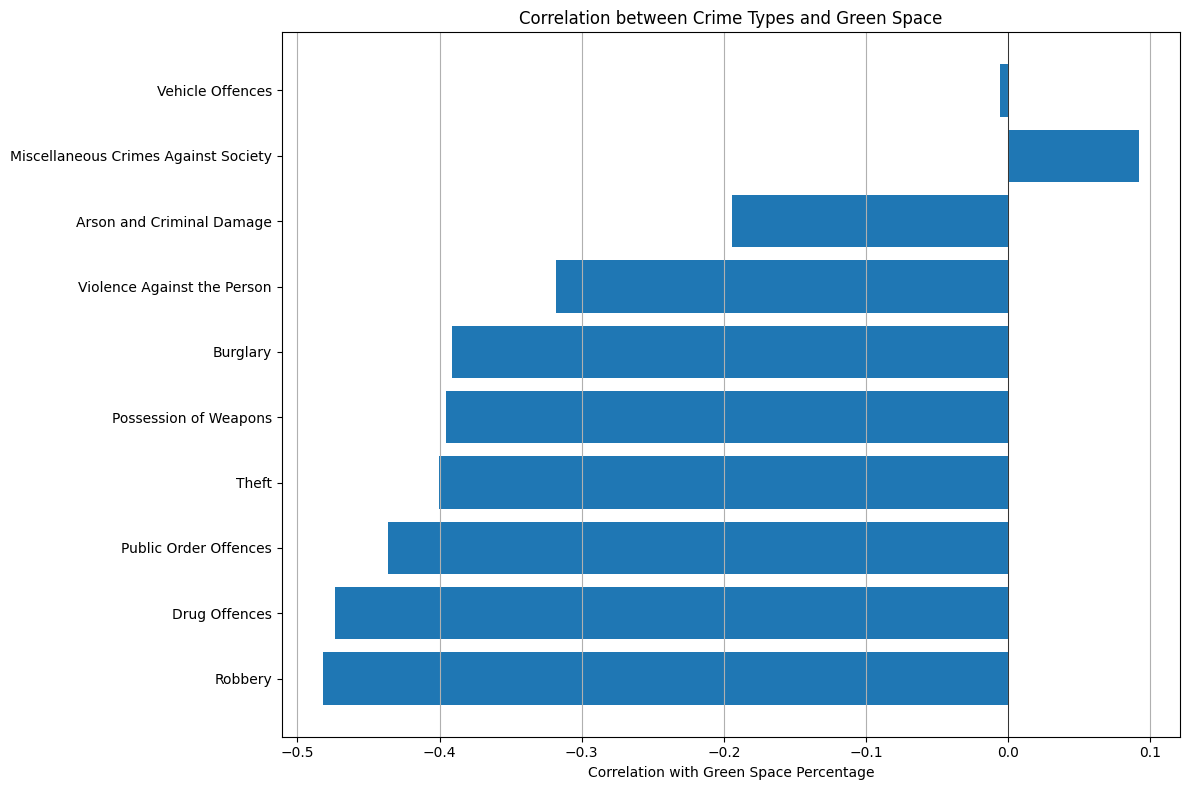

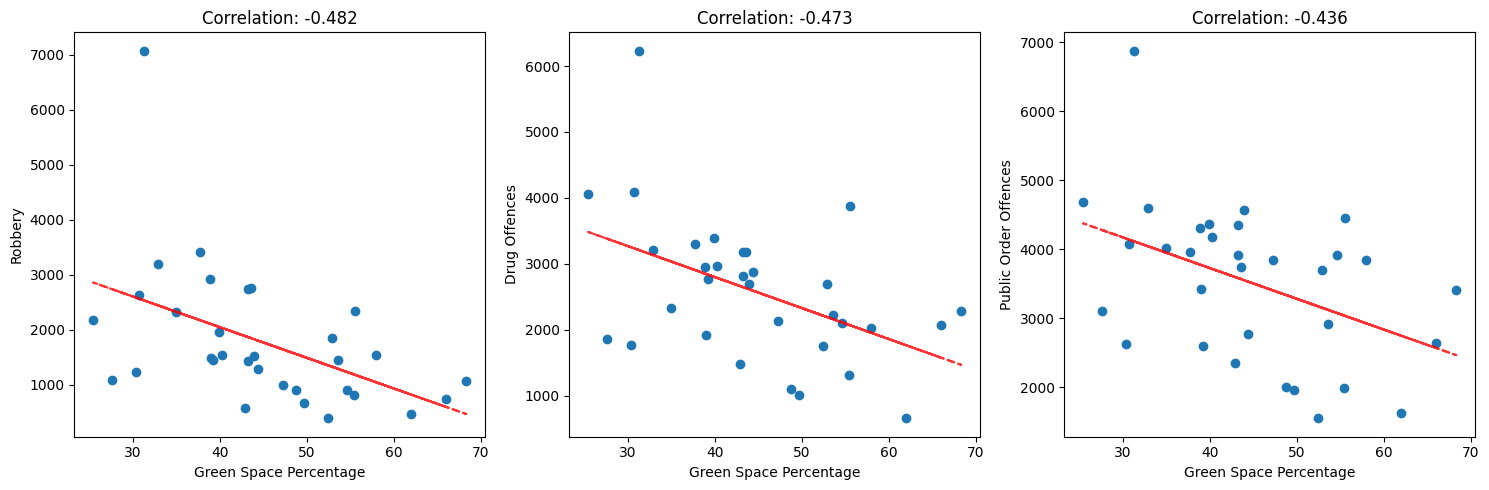


统计摘要：

绿地比例与犯罪类型的关系：
Robbery: 负相关 (相关系数: -0.482)
Drug Offences: 负相关 (相关系数: -0.473)
Public Order Offences: 负相关 (相关系数: -0.436)
Theft: 负相关 (相关系数: -0.400)
Possession of Weapons: 负相关 (相关系数: -0.396)
Burglary: 负相关 (相关系数: -0.391)
Violence Against the Person: 负相关 (相关系数: -0.318)


In [100]:

# 获取月份列
month_columns = [col for col in data.columns if col.isdigit()]

# 按区域和主要犯罪类型统计
crimes_by_major = data.groupby(['Borough', 'Major Category'])[month_columns].sum().sum(axis=1).reset_index()
crimes_by_major = crimes_by_major.pivot(index='Borough', columns='Major Category', values=0).reset_index()

# 将犯罪类型数据与之前的数据合并
merged_crimes = merged_data.merge(crimes_by_major, how='left', left_on='CODE', right_on='Borough')

# 清理数据
crime_types = [col for col in merged_crimes.columns if col in crimes_by_major.columns and col != 'Borough']
clean_data = merged_crimes.dropna(subset=['percent_green'] + crime_types)

# 计算每种犯罪类型与绿地率的相关性
correlations = {}
for crime_type in crime_types:
    corr = clean_data['percent_green'].corr(clean_data[crime_type])
    correlations[crime_type] = corr

# 按相关性绝对值排序
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("\n各类犯罪与绿地率的相关性（按绝对值排序）：")
for crime_type, corr in sorted_correlations:
    print(f"{crime_type}: {corr:.3f}")

# 找出相关性最强的几种犯罪类型，分析它们的详细情况
top_crimes = [crime_type for crime_type, _ in sorted_correlations[:3]]

# 可视化相关性
plt.figure(figsize=(12, 8))
correlations_values = [corr for _, corr in sorted_correlations]
crime_types_labels = [crime_type for crime_type, _ in sorted_correlations]

# 创建条形图
plt.barh(range(len(correlations_values)), correlations_values)
plt.yticks(range(len(crime_types_labels)), crime_types_labels)
plt.xlabel('Correlation with Green Space Percentage')
plt.title('Correlation between Crime Types and Green Space')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# 为相关性最强的犯罪类型创建散点图
plt.figure(figsize=(15, 5))
for i, crime_type in enumerate(top_crimes):
    plt.subplot(1, 3, i+1)
    plt.scatter(clean_data['percent_green'], clean_data[crime_type])
    plt.xlabel('Green Space Percentage')
    plt.ylabel(crime_type)
    z = np.polyfit(clean_data['percent_green'], clean_data[crime_type], 1)
    p = np.poly1d(z)
    plt.plot(clean_data['percent_green'], p(clean_data['percent_green']), "r--", alpha=0.8)
    plt.title(f'Correlation: {correlations[crime_type]:.3f}')
plt.tight_layout()
plt.show()

# 输出统计摘要
print("\n统计摘要：")
print("\n绿地比例与犯罪类型的关系：")
for crime_type, corr in sorted_correlations:
    if abs(corr) > 0.3:  # 只显示相关性较强的
        if corr > 0:
            relationship = "正相关"
        else:
            relationship = "负相关"
        print(f"{crime_type}: {relationship} (相关系数: {corr:.3f})")

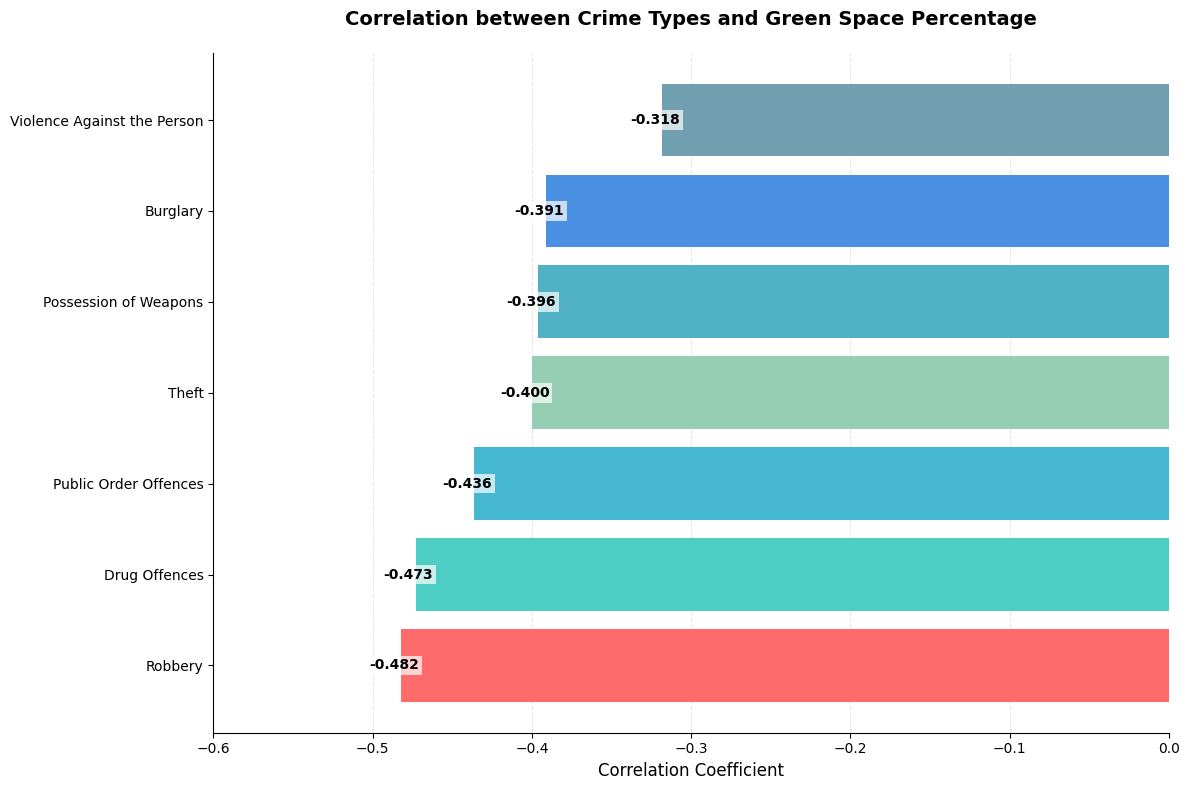

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# 准备数据
crime_types = ['Robbery', 'Drug Offences', 'Public Order Offences', 
               'Theft', 'Possession of Weapons', 'Burglary', 
               'Violence Against the Person']
correlations = [-0.482, -0.473, -0.436, -0.400, -0.396, -0.391, -0.318]

# 使用更好看的颜色方案
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#4FB0C6', '#4A90E2', '#709FB0']

# 创建图形
plt.figure(figsize=(12, 8), facecolor='white')

# 创建水平条形图
bars = plt.barh(crime_types, correlations, color=colors)

# 添加标题和标签
plt.title('Correlation between Crime Types and Green Space Percentage', 
         fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)

# 添加网格线
plt.grid(True, axis='x', linestyle='--', alpha=0.3)

# 添加零线
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# 在每个条形上添加具体数值
for bar in bars:
    width = bar.get_width()
    plt.text(width-0.02, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}',
             ha='left', 
             va='center', 
             fontsize=10,
             fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=2))

# 设置背景色
plt.gca().set_facecolor('white')
plt.gca().set_axisbelow(True)

# 设置y轴标签的字体
plt.yticks(fontsize=10)

# 设置x轴范围，使图形更加对称
plt.xlim(-0.6, 0)

# 移除上边框和右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()



分析解释：
所有主要犯罪类型都与绿地比例呈现负相关，其中：
1. 抢劫犯罪与绿地比例的负相关性最强（-0.482）
2. 毒品犯罪紧随其后（-0.473）
3. 扰乱公共秩序犯罪排第三（-0.436）

这表明，绿地比例较高的区域通常具有较低的犯罪率，
特别是在抢劫、毒品和公共秩序犯罪方面。